### Kaetlyn Gibson, Math 351
### I did not do 2 of the problems. Also sorry for being late.


# Chapter 1 - Computer exercises

In order to succeed in Math 351, you're going to have to read the textbook quite closely.  This is true for any math class in any term, of course, but it's *even more* true for a fully online version of a Numerical Analysis class!

These exercises are meant to accompany your reading of the text, and in fact I'm writing them as I read my own way through the text to prepare the lectures.  

Please answer the coding question with clear python code, and the writing questions with clearly written short answers.  You can add new cells to this worksheet with your answers.  Please delete any problems you're not answering.


## Grading Scheme

I have included below 8 problems - four from section 1.1, and four from section 1.2.  Please do some of them (not all from the same section of the text, please).

To get a C on this assignment, do at least 4 of the problems.

To get a B, do at least 6 problems.

To get an A, do all the problems.

Independently: if your writing is good, your code is clean and your work is in general particularly well presented, I'll give you an +  (making your grade A+, B+, or C+).  If it's hard for me to read and understand, I'll give you a - (making your grade A-,B- or C-).  

## A couple notes

*Note:* if English is not your first language, or Python is not your first computer language, please don't worry about it! I don't care about your spelling and I only care a little about your grammar.  I care a lot about whether you are *clear*.  If you're not sure whether your work is clear, show it to a friend and see if they understand it.

*Note:* If you don't like the grade you ended up with I'll give you a chance to revise and resubmit.

## Section 1.1: Let's do Example 2

Consider the system of equations
\begin{align} 
0.1036x + 0.2122y &= 0.7381 \\
0.2081x + 0.4247y &= 0.9327 \\
\end{align}

on Page 4 of the textbook (that's the page number which is printed; in my version of the text it's the 29th page of the PDF).  Follow the Solution in the example, using python as a calculator.  Let's write the above equation as
\begin{align}
ax + by &= c \\
dx + ey &= f \\
\end{align}

so that $a=0.1036$, $b=0.2122$, and so on.  We're going to multiply the second equation by some number $\alpha$ and subtract it from the first equation - but we're only going to keep D significant digits of the calculation throughout (to start with, D=3). That means we're going to round off the *INPUTS* and *OUTPUTS* of every arithmetic operation to D places.  So, for instance we might say something like this:

In [1]:
[a,b,c] = [0.1036, 0.2122, 0.7381]
[d,e,f] = [0.2081, 0.4247, 0.9327]
D = 3

alpha= round(round(d,D)/round(a,D),D)
print(alpha)

0.208
0.104
2.0


which is the value of alpha that the text book comes up with - see the line "...the *multiplier* $\alpha=0.208/0.104 \approx 2.00$..."

**Coding question:** Finish the computation - find the new coefficient of the $x$ term and the $y$ term, find the right side, and find the value of $y$.  Then change $D$, the amount of rounding - first to 4 decimals, then to enough decimals so that (in practice) no rounding is occuring at all.  See if you can duplicate the textbook's results. 

**Writing question:** 
1. Why does this particular system of equations behave so badly with respect to rounding? That is, if you wanted to construct another example of this phenomenon, how would you go about doing it?  
2. If rounding is so bad, why does the text say, on Page 6, that "As a rule of thumb, one should keep as many significant digits in a sequence of calculations as there are in the least accurate number involved in the computations?"

In [45]:
# coding question

for D in [3, 4, 10]:
    print(f"D = {D}")
    alpha= round(round(d,D)/round(a,D),D)
    # > Find x-term coefficient
    xTermCo = round(round(d, D)-((alpha)*round(a,D)), D)
    print("-> xTerm coefficient is:", xTermCo)
    # > Find y-term coefficient
    yTermCo = round(round(e, D)-((alpha)*round(b, D)), D)
    print("-> yTerm coefficient is:", yTermCo)
    # > Find right side
    rightSide = round(round(f, D) - (alpha)*round(c,D), D)
    print("-> right side is:", rightSide)
    # > Find value of y
    yValue = round(rightSide/(yTermCo), D)
    print("-> y value is:", yValue)
    print("")
    

D = 3
-> xTerm coefficient is: 0.0
-> yTerm coefficient is: 0.001
-> right side is: -0.543
-> y value is: -543.0

D = 4
-> xTerm coefficient is: -0.0
-> yTerm coefficient is: -0.0015
-> right side is: -0.5499
-> y value is: 366.6

D = 10
-> xTerm coefficient is: -0.0
-> yTerm coefficient is: -0.0015434363
-> right side is: -0.5499120656
-> y value is: 356.2907426759



**Q1: Why does this particular system of equations behave so badly with respect to rounding? That is, if you wanted to construct another example of this phenomenon, how would you go about doing it?** 

Loss of precision may be occurring from roundoff errors. To avoid replication, data should not be rounded off prior to each of the calculations, and instead full precision should be carried through calculations.

---
**Q2: If rounding is so bad, why does the text say, on Page 6, that "As a rule of thumb, one should keep as many significant digits in a sequence of calculations as there are in the least accurate number involved in the computations?"**

To avoid having higher precision than is warranted.

## Section 1.1: Rounding and chopping

On Page 6, a notion of *round-to-even* or *banker's rounding* is introduced.  The textbook asserts that "over a large set of data, the round-to-even rule tends to reduce the total rounding error with (on average) an equal proportion of numbers rounding up as well as rounding down".  

**programming exercise:** Write three python functions: chop, round_to_even, round_up, which work like the built-in Python function round() that I used in the previous example, but implement chopping, banker's rounding, and "naive rounding", in which numbers ending in a 5 are always rounded up.  

**experiment:** Figure out which of these different rounding techniques Python's round() function is using (see the previous exercise).

**experiment/writing exercise**: Here's some code which makes a small list of random numbers, rounds them off, and adds them together:

In [2]:
from random import random

In [441]:
L = [random() for i in range(5)]
L_rounded = [round(u, 3) for u in L]

print(sum(L), sum(L_rounded))

2.2911952895186327 2.292


In [454]:
from random import *
#print float("{0:.2f}".format(random.uniform(greaterThan, lessThan)))

L = [float("{0:.2f}".format(randrange(1, 20)))]
print (L)
# L_rounded = [round(u, 3) for u in L]

# print(sum(L), sum(L_rounded))

[11.0]


Do something similar with your three functions, but with a *big* list of numbers.  Think of an experiment you can do to compare the rounding errors involved with your three rounding methods; explain what you did, run the experiment and report the results.  Do you agree with the text that banker's rounding is better than the other options?

In [514]:
# Programming exercise
def chop1(x, n):
    """ digits that follow nth digit are discarded and none of the remaining n digits are changed """
    # I am assuming we are counting digits from left to right and not exclusively decimal digits
    # for example, chopping at the third digit of 245.6854 yields 245, not 245.685
    xString = str(x)       
    
    if (x*10) % 10 != 0:
        # check if x has a decimal, and where it is
        digitsBeforeDecimal = 0
        digitsAfterDecimal = 0
        decimalDigit = 0
        decimalDigitFound = False
        for digit in range(len(xString)):
            if decimalDigitFound is False:
                digitsBeforeDecimal = digit
            if xString[digit] == ".":
                decimalDigit = digit
                decimalDigitFound = True
            if digit > decimalDigit and decimalDigitFound is True:
                digitsAfterDecimal += 1
        # chop the digits after n
        removeDecimalDigits = x * (10**(digitsAfterDecimal))
        separateChopped = str(removeDecimalDigits)[:n]
        recoverPostChopNum = int(separateChopped) * (10**-(n - digitsBeforeDecimal))
    else:
        # if x does not have a decimal
        separateChopped = (x * (10**-n)) 
        chopDigits = int(separateChopped)
        recoverPostChopNum = chopDigits * (10**n)
    return recoverPostChopNum
            
    
print(chop(245.6854, 3))
print("============")
print(chop(2445, 3))
print("============")

print("============")
print(chop(2445.65787, 5))
print("============")
print(chop(2445.65787, 2))

245.685
2445
2445.65787
2445.65


In [507]:
def chop(x, n):
    """ digits that follow nth digit are discarded and none of the remaining n digits are changed """
    # I am assuming we are exclusively decimal digits now, for testing purposes since it seemed odd to try and compare
    # to the other rounding. This goes from left to right of the decimal point.
    xString = str(x)       
    
    if (x*10) % 10 != 0:
        # check if x has a decimal, and where it is
        digitsBeforeDecimal = 0
        digitsAfterDecimal = 0
        decimalDigit = 0
        decimalDigitFound = False
        for digit in range(len(xString)):
            if decimalDigitFound is False:
                digitsBeforeDecimal = digit
            if xString[digit] == ".":
                decimalDigit = digit
                decimalDigitFound = True
            if digit > decimalDigit and decimalDigitFound is True:
                digitsAfterDecimal += 1
        # chop the decimal digits after n
        removeDecimalDigits = x * (10**n)
        separateChopped = int(removeDecimalDigits)
        recoverPostChopNum = separateChopped*(10**-(n))
    else:
        # if x does not have a decimal
        return x
    return recoverPostChopNum
            
    
print(chop(0.6854, 3))
print("============")
print(chop(2445.6578, 2))
print("============")
print(chop(2445.65782, 4))
print("============")
print(chop(2445.65787, 1))

0.685
2445.65
2445.6578
2445.6


In [518]:
# check for error; chop
from random import *

L1 = [(randrange(0, 100000)+ 0.5) for i in range(1001)]
L1_rounded = [chop(x, 1) for x in L1]
print(sum(L1), sum(L1_rounded))
print(sum(L1) - sum(L1_rounded))

L2 = [(randrange(0, 100000)+ 0.05) for i in range(1001)]
L2_rounded = [chop(x, 1) for x in L2]
print(sum(L2), sum(L2_rounded))
print(sum(L2) - sum(L2_rounded))

L3 = [(randrange(0, 100000)+ 0.105) for i in range(1001)]
L3_rounded = [chop(x, 1) for x in L3]
print(sum(L3), sum(L3_rounded))
print(sum(L3) - sum(L3_rounded))

print("==================================================")
# check for error; chop1

L4 = [(randrange(0, 100000)+ 0.5) for i in range(1001)]
L4_rounded = [chop1(x, 1) for x in L4]
print(sum(L4), sum(L4_rounded))
print(sum(L4) - sum(L4_rounded))

L5 = [(randrange(0, 100000)+ 0.05) for i in range(1001)]
L5_rounded = [chop1(x, 1) for x in L5]
print(sum(L5), sum(L5_rounded))
print(sum(L5) - sum(L5_rounded))

L6 = [(randrange(0, 100000)+ 0.105) for i in range(1001)]
L6_rounded = [chop1(x, 1) for x in L6]
print(sum(L6), sum(L6_rounded))
print(sum(L6) - sum(L6_rounded))

49930104.5 49930104.5
0.0
48911959.04999937 48911909.0
50.049999371171
51052155.10499912 51052150.10000091
5.004998207092285
50111037.5 45426700
4684337.5
52096654.04999928 47546730
4549924.049999282
51274276.104999095 46763830
4510446.104999095


The test for chop is somewhat limited. While the |0.0| error difference is nice, it doesn't mean much given the sample set. Changing the end from 0.5 to 0.05 starts to show more difference, though 0.105 doesn't seem to do much.


The results for chop1 on the other hand are very bad. The difference in error is huge, though the test likely sets it up for failure. Starting from left to right makes me question if it should have been going from right to left nth digit...

In [436]:
# python uses this one
def round_to_even(x):
    """ numbers halfway between two integers get rounded to nearest even integer (such as, 4.5 to 4, 5.5 to 6) """
    # check that it ends halfway (ends in 0.5)
    errorMessage = "This function isn't testing that. Stop it! Instead try a number that ends in 0.5"
    xString = str(x)
    lastDigit = int(xString[-1]) 
    if lastDigit % 5 == 0:
        if (x + 0.5) % 2 == 0:
            roundedUp = int(0.5 + x)
            return roundedUp
        elif (x + 1.5) % 2 == 0:    
            roundedDown = int(x - 0.5)
            return roundedDown
        else:
            return errorMessage 
    else:
        return errorMessage 
    

print(round_to_even(4.5))
print("============")
print(round_to_even(5.5))
print("============")
print(round_to_even(5.6))
print("============")
print(round_to_even(5.65))
print("============")
print(round(4.5))
print(round(5.5))

4
6
This function isn't testing that. Stop it! Instead try a number that ends in 0.5
This function isn't testing that. Stop it! Instead try a number that ends in 0.5
4
6


In [493]:
# check for error; round_to_even
from random import *

L1 = [(randrange(0, 100000)+ 0.5) for i in range(1001)]
L1_rounded = [round_to_even(x) for x in L1]
print(sum(L1), sum(L1_rounded))
print(sum(L1) - sum(L1_rounded))

497939965.5 497939994
-28.5


I checked only numbers that ended in 0.5 for this, which is an obvious limitation. The difference in error was fairly small for this test at only |0.5| (rounded_to_even being 0.5 smaller). Definitely can see why this method of rounding would be used.

In [480]:
def round_up(x):
    """ numbers ending in a 5 are rounded up """
    xString = str(x)
    # check if x has a decimal, and where it is
    digitsAfterDecimal = 0
    decimalDigit = 0
    decimalDigitFound = False
    for digit in range(len(xString)):
        if xString[digit] == ".":
            decimalDigit = digit
            decimalDigitFound = True
        if digit > decimalDigit and decimalDigitFound is True:
            digitsAfterDecimal += 1

    # get the last digit in x
    lastDigit = int(xString[-1])    
    # check if last digit is divisible by 5 and not divisible by 10
    if (lastDigit) % 5 == 0 and (lastDigit) % 10 != 0:  
        # round up to next digit
        # print(f"last digit of {x}, {lastDigit}, is a 5; round x")
        # make x have no decimal, add 5 to round up, then put back the decimal
        isolateDigit = x * (10**(digitsAfterDecimal))
        roundUp = isolateDigit + 5
        putBackRounded = roundUp / (10**(digitsAfterDecimal))
#         print(isolateDigit)
#         print(roundUp)
#         print(putBackRounded)
        # if it ends in 0, remove decimal (not necessary?)
        if (putBackRounded*10) % 10 == 0:
            return int(putBackRounded)
        return putBackRounded

    else:
        # no need to round, x did not end in 5
        # print(f"last digit of {x}, {lastDigit}, is NOT a 5; no rounding x")
        return x

# Tests
print(round_up(35))
print("============")
print(round_up(40))
print("============")
print(round_up(3335.65415))
print("============")
print(round_up(35.521345))
print("============")
print(round_up(0.12))



40
40
3335.6542
35.52135
0.12


In [524]:
# check for error; round_up
from random import *

L1 = [(randrange(0, 100000)+ 0.5) for i in range(1001)]
L1_rounded = [round_up(x) for x in L1]
print(sum(L1), sum(L1_rounded))
print(sum(L1) - sum(L1_rounded))

L2 = [(randrange(0, 100000)+ 0.14505) for i in range(1001)]
L2_rounded = [round_up(x) for x in L2]
print(sum(L2), sum(L2_rounded))
print(sum(L2) - sum(L2_rounded))

L3 = [randrange(0, 100000, 5) for i in range(1001)]
L3_rounded = [round_up(x) for x in L3]
print(sum(L3), sum(L3_rounded))
print(sum(L3) - sum(L3_rounded))

50765198.5 50765699
-500.5
50296107.19504909 50296107.24509947
-0.05005037784576416
50505175 50507680
-2505


Seems like something doesn't round 100% correctly when rounding up from 5, especially in endings with 0.05.
When looking at the first test (ending in 0.5), round_up definitely over estimates (difference of |500.5|). It's not bad, but it 
looks like the difference in error scales much more than the banker's rounding method.

## Section 1.1: Synthetic Division / Horner's algorithm

**Programming exercise:** Implement Horner's algorithm, which is shown in pseudocode on Pages 7 and 8, as a python function.  The arguments should be x (a number where you'd like to evaluate the polynomial p), and a (a list of the coefficients of p).  You can start like this:

In [530]:
def horner(x, a):
    n = len(a)-1
    rb = [a[-1]]
    b = [a[-1]]
    # ... continue.  You can now use a[0], ..., a[n] for the coefficients of p.
    for i in range(n-1, -1, -1):
        rb.append(a[i] + x*b[-1])
        b.append(rb[-1])
    r = b.pop() # pop p(x) off the list
    return (b, r)

horner(3, [-2,-5,7,-4,1])

([1, -1, 4, 7], 19)

Have the function return (b,r), where b is a list of the numbers b[0],...,b[n-1] (see equation (4)) and r is p(x).

When you're done, you should be able to do Example 4 like this:

In [135]:
horner(3, [-2,-5,7,-4,1]) # the result should be ([7,4,-1,1], 19)

**Writing exercise:** It's pretty clear why Horner's algorithm computes the remainder $r$.  But why on earth does it compute the polynomial $q$?  That is, explain why $p(t) = (t-x)q(t) + r$, where $t$ is a variable and $p,q,x,r$ are as in the text.  The answer to this is probably also in the text, but I would like you to explain it in your own words.

We are removing a linear factor from a polynomial. In the case of the example, we are dividing p(t) = t<sup>4</sup> - 4t<sup>3</sup> + 7t<sup>2</sup> - 5t - 2 by (t-3), which should give us a quotient polynomial $q(t)$ and a remainder $r$. In short, this format of $p(t) = (t-x)q(t) + r$ follows the remainder theorem, which is why it would give us polynomial $q$.

## Section 1.1: Derivatives are awful

**programming exercise:** Implement the pseudocode listed on Page 10 (the program called "first");  See also computer problems 1.1 and 1.2 in the text.

**writing exercise:** What's going wrong here?  Why is it hard to compute derivatives numerically?

In [215]:
from math import *

def first(x):
    n = 30
    h = 1
    emax = 0
    for i in range(1, n+1):
        h = 0.25*h
        y = (sin(x + h) - sin(x)) / h
        error = abs(cos(x) - y)
        print(f"i: {i}")
        print(f"h: {h}")
        print(f"y: {y}")
        print(f"error: {error}")
        if error > emax:
            emax = error
            imax = i
    
    print("")
    print(f"imax = {imax}")
    print(f"emax = {emax}")
    return

first(0.5)

i: 1
h: 0.25
y: 0.8088528856765245
error: 0.06872967621384829
i: 2
h: 0.0625
y: 0.8620341589090739
error: 0.015548402981298892
i: 3
h: 0.015625
y: 0.873801417582083
error: 0.0037811443082897966
i: 4
h: 0.00390625
y: 0.8766439532697916
error: 0.0009386086205811495
i: 5
h: 0.0009765625
y: 0.8773483279197194
error: 0.0002342339706533636
i: 6
h: 0.000244140625
y: 0.8775240295472031
error: 5.8532343169659384e-05
i: 7
h: 6.103515625e-05
y: 0.8775679304389996
error: 1.4631451373148252e-05
i: 8
h: 1.52587890625e-05
y: 0.8775789041283133
error: 3.6577620594613336e-06
i: 9
h: 3.814697265625e-06
y: 0.8775816474517342
error: 9.144386385884218e-07
i: 10
h: 9.5367431640625e-07
y: 0.8775823332834989
error: 2.2860687387549206e-07
i: 11
h: 2.384185791015625e-07
y: 0.8775825046468526
error: 5.724352014624401e-08
i: 12
h: 5.960464477539063e-08
y: 0.8775825472548604
error: 1.4635512357585867e-08
i: 13
h: 1.4901161193847656e-08
y: 0.8775825574994087
error: 4.390964036815603e-09
i: 14
h: 3.725290298461914e-

As i gets larger, h becomes increasingly smaller, and eventually the error becomes larger. Y ends up being zero. Having such a large error does not bode well for computing derivatives numerically. 

In [580]:
# did f(x) = cos(x) at point x = pi
def second(x):
    n = 30
    h = 1
    emax = 0
    for i in range(1, n+1):
        h = 0.25*h
        y = (cos(x+h)-cos(x)) / h
        error = abs(-sin(x)-y)
        print(f"i: {i}")
        print(f"h: {h}")
        print(f"y: {y}")
        print(f"error: {error}")
        if error > emax:
            emax = error
            imax = i
            
    print("")
    print(f"imax = {imax}")
    print(f"emax = {emax}")
    return

first(pi)

i: 1
h: 0.25
y: -0.989615837018092
error: 0.0103841629819084
i: 2
h: 0.0625
y: -0.999349085478083
error: 0.000650914521916790
i: 3
h: 0.015625
y: -0.999959310392536
error: 0.0000406896074641727
i: 4
h: 0.00390625
y: -0.999997456870430
error: 0.00000254312957015390
i: 5
h: 0.0009765625
y: -0.999999841054288
error: 1.58945711814518E-7
i: 6
h: 0.000244140625
y: -0.999999990065893
error: 9.93410742555767E-9
i: 7
h: 6.103515625e-05
y: -0.999999999379118
error: 6.20881679402885E-10
i: 8
h: 1.52587890625e-05
y: -0.999999999961195
error: 3.88051812905132E-11
i: 9
h: 3.814697265625e-06
y: -0.999999999997575
error: 2.42528219729365E-12
i: 10
h: 9.5367431640625e-07
y: -0.999999999999848
error: 1.51656465163796E-13
i: 11
h: 2.384185791015625e-07
y: -0.999999999999991
error: 9.43689570931383E-15
i: 12
h: 5.960464477539063e-08
y: -0.999999999999999
error: 5.55111512312578E-16
i: 13
h: 1.4901161193847656e-08
y: -1.00000000000000
error: 0
i: 14
h: 3.725290298461914e-09
y: -1.00000000000000
error: 0
i:

y hits -1, then eventually becomes 0. The error was at 0 for a while, which is interesting, but then became 1 (which makes sense given the calculation).

## Section 1.2: Plotting some Taylor polynomials

**programming exercise** If we expand the function $f(x) = \sin(x)$ in the (well-known) Taylor series around the point $x=0$, we get
$$
1 - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots
$$
and if we truncate this at the $x^{2n+1}$ term, we get the order-$(2n+1)$ Taylor polynomial for $\sin x$.  

Make a plot that shows the order-3, order-13, and order-19 taylor polynomials.  Here's how to make plots (in all honesty, I mostly copy-pasted the code from a google search, and you should do the same):

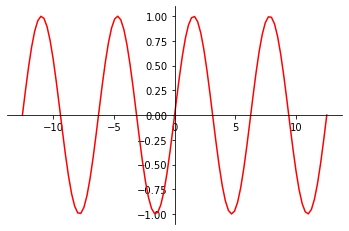

In [6]:
import matplotlib.pyplot as plt
import numpy as np
pi = np.pi

# 100 linearly spaced numbers
x = np.linspace(-4*pi,4*pi, 100)

# the function, which is y = x^2 here
y = np.sin(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

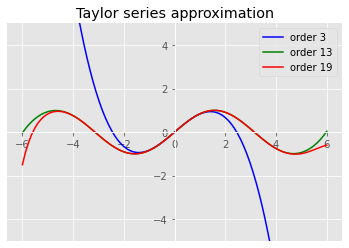

In [615]:
import matplotlib.pyplot as plt
import numpy as np
import math
pi = np.pi

# 100 linearly spaced numbers
x = np.linspace(-6,6, 100)

# the function
# yes, I manually typed them out :/
y1 = x - (x**3)/math.factorial(3)
y2 = x - (x**3)/math.factorial(3) + (x**5)/math.factorial(5) - (x**7)/math.factorial(7) + (x**9)/math.factorial(9) - (x**11)/math.factorial(11) + (x**13)/math.factorial(13)
y3 = x - (x**3)/math.factorial(3) + (x**5)/math.factorial(5) - (x**7)/math.factorial(7) + (x**9)/math.factorial(9) - (x**11)/math.factorial(11) + (x**13)/math.factorial(13) - (x**14)/math.factorial(14) + (x**15)/math.factorial(15) - (x**16)/math.factorial(16) + (x**17)/math.factorial(17) - (x**18)/math.factorial(18) + (x**19)/math.factorial(19)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y1, 'b', label='order 3') # order 3
plt.plot(x,y2, 'g', label='order 13') # order 13
plt.plot(x,y3, 'r', label='order 19') # order 19
plt.legend()
plt.title('Taylor series approximation')
plt.ylim([-5,5])


# show the plot
plt.show()

Not sure that my graphs are displaying the functions the best... but this is the best I could do.

## Section 1.2: Your scientists were so preoccupied with whether or not they could, they didn't stop to think if they should

**programming exercise** Section 1.2, example 9 (on page 29) asserts that we can compute $\ln 2$ pretty accurately by summing up a million terms of a certain series.  I bet that's not nearly as bad as the textbook says it is, computers do a million computations pretty quickly these days!  See if you can do it.  

Actually, maybe start by verifying the computation of Examples 8 and 10, each of which involves way less than a million things.

**writing exercise** Document what you learned.  Making a computer do a big computation is always fascinating, and you might need to use some ingenuity to actually get it to happen.  If your naive code is going too slow, make the problem a little simpler, so that your naive code works, and then try and speed it up.


In [250]:
# example 8
from math import *
def sin1(n):
    # n being number of terms used
    seriesSum = 0
    for i in range(n+1):
        term = (((-1)**(i))/factorial(2*i+1))
        seriesSum += term
    return seriesSum

print(sin1(20))

0.8414709848078965


In [254]:
# example 10
def piToThe4thDividedBy90(n):
    # n being number of terms used
    seriesSum = 0
    for i in range(1, n+1):
        term = i**(-4)
        seriesSum += term
    return seriesSum

print(piToThe4thDividedBy90(88))

1.082322752848305


In [249]:
# ln(1+x) for ln2

# def ln1plusx(x, n):
#     # n being number of terms used
#     seriesSum = 0
#     for i in range(1, n+1):
#         term = (((-1)**(i+1))/i) * (x**i)
#         seriesSum += term
#     return seriesSum
        
# print(ln1plusx(1,2000000))

#ln2
def ln2(n):
    # n being number of terms used
    seriesSum = 0
    for i in range(1,n+1):
        term = (((-1)**(i+1))/i)
        seriesSum += term
    return seriesSum
        
print(ln2(2000000))

0.6931469305601015


Computers are way faster than me at calculating these answers using Taylor series!